The Black-Scholes formula for a call option is given by

\begin{equation}
\begin{split}
C(S,K,r,\sigma,T) &= S_0 \Phi(d_1) - K e^{-rT} \Phi(d_2)\\
            d_1 &= \frac{\log \frac{S_0}{K} +
            \left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}\\
\end{split}            
\end{equation}

The formula can be implemented in Python as follows:

In [4]:
import numpy as np
from scipy.stats import norm


def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)


Similarly, the Black-Scholes formula for a put option is given by

\begin{equation}
P(S,K,r,\sigma,T) = K e^{-rT} \Phi(-d_2) - S_0 \Phi(-d_1)
\end{equation}

In [5]:
def BlackScholesPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)


By put-call parity, which states that

\begin{equation}
C(S, K, r, \sigma, T) - P(S, K, r, \sigma, T) = S - Ke^{-rT},
\end{equation}

we know that call and put option should be worth the same amount when $K=Se^{rT}$.

In [6]:
S = 100.0
r = 0.05
T = 2.0
K = S * np.exp(r*T)
sigma = 0.4

In [7]:
print('Call price: %.4f' % BlackScholesCall(S, K, r, sigma, T))

Call price: 22.2703


In [8]:
print('Put price: %.4f' % BlackScholesPut(S, K, r, sigma, T))

Put price: 22.2703


In Additional Example 5 Question 16, we explain why is it that a call option struck at $K+\Delta K$ is worth more than a put option struck at $K-\Delta K$.

We can numerically verify this using our option pricing formula here.

In [9]:
dK = 2.0

In [10]:
print('Call price (K+dK): %.4f' % BlackScholesCall(S, K+dK, r, sigma, T))

Call price (K+dK): 21.5779


In [11]:
print('Put price (K-dK): %.4f' % BlackScholesPut(S, K-dK, r, sigma, T))

Put price (K-dK): 21.1751


Try implementing the Bachelier option pricing model. If we were to price a call option using the Bachelier model at $K + dK$, and a put option at $K - dK$, do you expect the price to be identical?

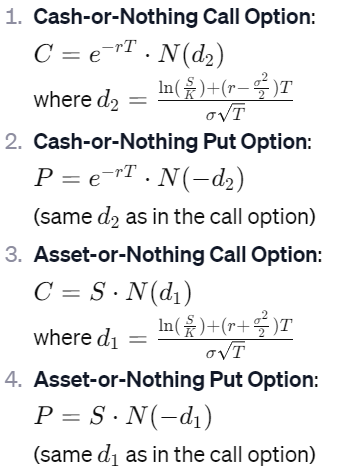

In [12]:
def BlackScholesDCashCall(S, K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(d2)

def BlackScholesDCashPut(S, K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(-d2)

def BlackScholesDAssetCall(S, K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1)

def BlackScholesDAssetPut(S, K, r, sigma ,T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(-d1)

In [13]:
S = 100  # Current Stock Price
K = 100  # Strike Price
r = 0.05  # Risk-Free Rate
sigma = 0.20  # Volatility
T = 1.0  # Time to Maturity
cash_call_value = BlackScholesDCashCall(S, K, r, sigma, T)
cash_put_value = BlackScholesDCashPut(S, K, r, sigma, T)
asset_call_value = BlackScholesDAssetCall(S, K, r, sigma, T)
asset_put_value = BlackScholesDAssetPut(S, K, r, sigma, T)
print('cash_call_value = ', cash_call_value)
print('cash_put_value = ', cash_put_value)
print('asset_call_value = ', asset_call_value)
print('asset_put_value = ', asset_put_value)

cash_call_value =  0.5323248154537634
cash_put_value =  0.41890460904695065
asset_call_value =  63.68306511756191
asset_put_value =  36.31693488243809


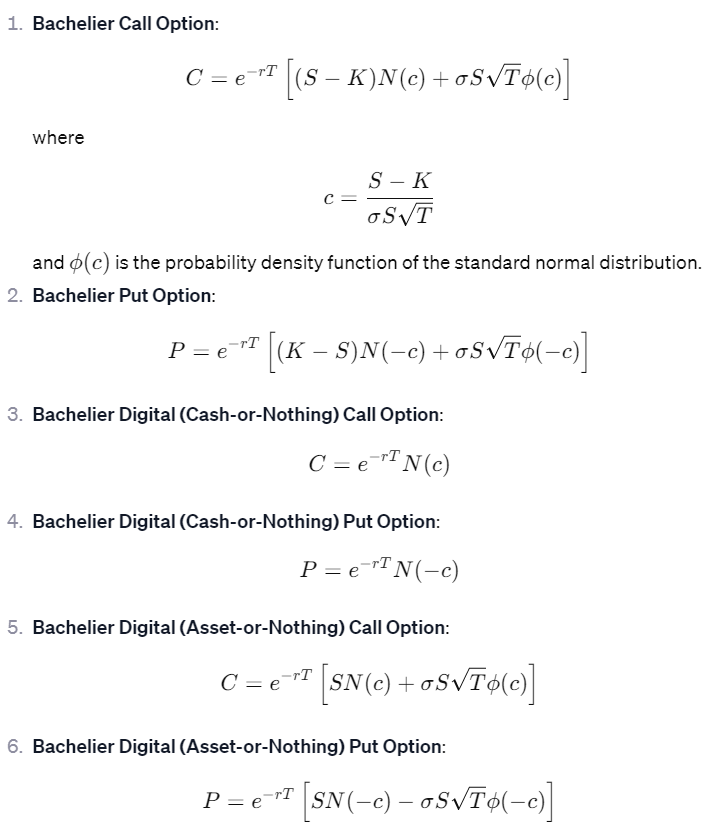

In [14]:
def BachelierCall(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return np.exp(-r*T)*((S-K)*norm.cdf(c) + sigma*S*np.sqrt(T)*norm.pdf(c))

def BachelierPut(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return np.exp(-r*T)*((K-S)*norm.cdf(-c) + sigma*S*np.sqrt(T)*norm.pdf(-c))   

def BachelierDCashCall(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(c)

def BachelierDCashPut(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return np.exp(-r*T)*norm.cdf(-c)

def BachelierDAssetCall(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return np.exp(-r*T)*(S*norm.cdf(c) + sigma*S*np.sqrt(T)*norm.pdf(c))

def BachelierDAssetPut(S, K, r, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return np.exp(-r*T)*(S*norm.cdf(-c) - sigma*S*np.sqrt(T)*norm.pdf(-c))

In [15]:
S = 100  # Current Stock Price
K = 100  # Strike Price
r = 0.05  # Risk-Free Rate
sigma = 0.20  # Volatility
T = 1.0  # Time to Maturity
BachelierCall_value = BachelierCall(S, K, r, sigma, T)
BachelierPut_value = BachelierPut(S, K, r, sigma, T)
BachelierDCashCall_value = BachelierDCashCall(S, K, r, sigma, T)
BachelierDCashPut_value = BachelierDCashPut(S, K, r, sigma, T)
BachelierDAssetCall_value = BachelierDAssetCall(S, K, r, sigma, T)
BachelierDAssetPut_value = BachelierDAssetPut(S, K, r, sigma, T)
print('BachelierCall_value = ', BachelierCall_value)
print('BachelierPut_value = ', BachelierPut_value)
print('BachelierDCashCall_value = ', BachelierDCashCall_value)
print('BachelierDCashPut_value = ', BachelierDCashPut_value)
print('BachelierDAssetCall_value = ', BachelierDAssetCall_value)
print('BachelierDAssetPut_value = ', BachelierDAssetPut_value)

BachelierCall_value =  7.589712715905146
BachelierPut_value =  7.589712715905146
BachelierDCashCall_value =  0.475614712250357
BachelierDCashPut_value =  0.475614712250357
BachelierDAssetCall_value =  55.15118394094085
BachelierDAssetPut_value =  39.97175850913055


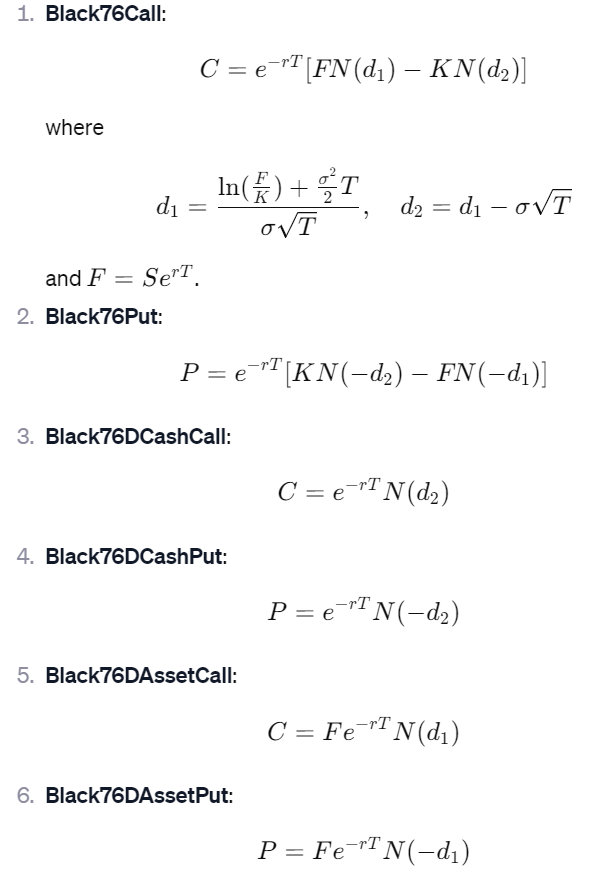

In [16]:
def Black76Call(S, K, r, sigma, T):
    F = np.exp(r*T)*S
    d1 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(F*norm.cdf(d1) - K*norm.cdf(d2))

def Black76Put(S, K, r, sigma, T):
    F= np.exp(r*T)*S
    d1 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(K*norm.cdf(-d2) - F*norm.cdf(-d1))

def Black76DCashCall(S, K, r, sigma, T):
    F = np.exp(r*T)*S
    d1 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(d2)

def Black76DCashPut(S, K, r, sigma, T):
    F = np.exp(r*T)*S
    d1 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(-d2)

def Black76DAssetCall(S, K, r, sigma, T):
    F = np.exp(r*T)*S
    d1 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return F*np.exp(-r*T)*norm.cdf(d1)

def Black76DAssetPut(S, K, r, sigma, T):
    F = np.exp(r*T)*S
    d1 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return F*np.exp(-r*T)*norm.cdf(-d1)

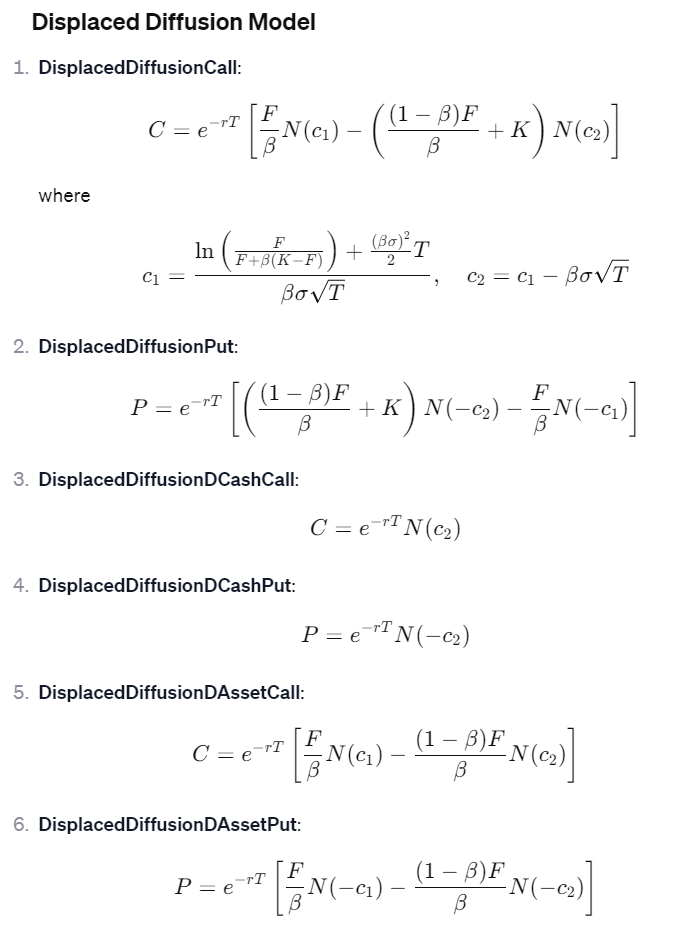

In [17]:
def DisplacedDiffusionCall(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*(F/beta*norm.cdf(c1) - ((1-beta)/beta*F + K)*norm.cdf(c2))

def DisplacedDiffusionPut(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*(((1-beta)/beta*F + K)*norm.cdf(-c2) - F/beta*norm.cdf(-c1))

def DisplacedDiffusionDCashCall(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(c2)

def DisplacedDiffusionDCashPut(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(-c2)

def DisplacedDiffusionDAssetCall(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*(F/beta*norm.cdf(c1) - ((1-beta)/beta*F)*norm.cdf(c2))

def DisplacedDiffusionDAssetPut(S, K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    return np.exp(-r*T)*(F/beta*norm.cdf(-c1) - ((1-beta)/beta*F)*norm.cdf(-c2))

In [18]:
# Sample parameters
S = 100  # Current Stock Price
K = 100  # Strike Price
r = 0.05  # Risk-Free Rate
sigma = 0.20  # Volatility
T = 1.0  # Time to Maturity
beta = 0.8  # Beta for Displaced Diffusion Model

# Bachelier Model
print("Bachelier Model Results:")
print("Call:", BachelierCall(S, K, r, sigma, T))
print("Put:", BachelierPut(S, K, r, sigma, T))
print("Digital Cash Call:", BachelierDCashCall(S, K, r, sigma, T))
print("Digital Cash Put:", BachelierDCashPut(S, K, r, sigma, T))
print("Digital Asset Call:", BachelierDAssetCall(S, K, r, sigma, T))
print("Digital Asset Put:", BachelierDAssetPut(S, K, r, sigma, T))

# Black '76 Model
print("\nBlack '76 Model Results:")
print("Call:", Black76Call(S, K, r, sigma, T))
print("Put:", Black76Put(S, K, r, sigma, T))
print("Digital Cash Call:", Black76DCashCall(S, K, r, sigma, T))
print("Digital Cash Put:", Black76DCashPut(S, K, r, sigma, T))
print("Digital Asset Call:", Black76DAssetCall(S, K, r, sigma, T))
print("Digital Asset Put:", Black76DAssetPut(S, K, r, sigma, T))

# Displaced Diffusion Model
print("\nDisplaced Diffusion Model Results:")
print("Call:", DisplacedDiffusionCall(S, K, r, sigma, T, beta))
print("Put:", DisplacedDiffusionPut(S, K, r, sigma, T, beta))
print("Digital Cash Call:", DisplacedDiffusionDCashCall(S, K, r, sigma, T, beta))
print("Digital Cash Put:", DisplacedDiffusionDCashPut(S, K, r, sigma, T, beta))
print("Digital Asset Call:", DisplacedDiffusionDAssetCall(S, K, r, sigma, T, beta))
print("Digital Asset Put:", DisplacedDiffusionDAssetPut(S, K, r, sigma, T, beta))


Bachelier Model Results:
Call: 7.589712715905146
Put: 7.589712715905146
Digital Cash Call: 0.475614712250357
Digital Cash Put: 0.475614712250357
Digital Asset Call: 55.15118394094085
Digital Asset Put: 39.97175850913055

Black '76 Model Results:
Call: 10.450583572185579
Put: 5.573526022256967
Digital Cash Call: 0.5323248154537635
Digital Cash Put: 0.4189046090469505
Digital Asset Call: 63.68306511756193
Digital Asset Put: 36.31693488243808

Displaced Diffusion Model Results:
Call: 10.493347372389069
Put: 5.616289822460465
Digital Cash Call: 0.5393455959668988
Digital Cash Put: 0.41188382853381517
Digital Asset Call: 64.42790696907896
Digital Asset Put: 35.57209303092105
